In [1]:
import pandas as pd
df=pd.read_csv('Advertising.csv') # reading the dataset
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### 1) Explain the dataset

In [2]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.info()  #gives concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


The given dataset has 5 columns having 200 entries(rows) each with no null values present.
The dataset contains the advertising expenditure for 3 media which are TV(column 1), Radio(column 2) and Newspaper(column 3) and the overall Sales(column 4) generated in 200 different markets((column 0)numbered from 0 to 199)

### 2) Check the summary statistics and discuss the max, min, avg, median, and percentiles

In [4]:
df.describe(exclude=['int']) # calculates certain statistical data for the dataset excluding column 0 which is of type int

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Text(0.5, 1.0, 'Box-plot indicating max,min,avg(+),median,quartile1,quartile3')

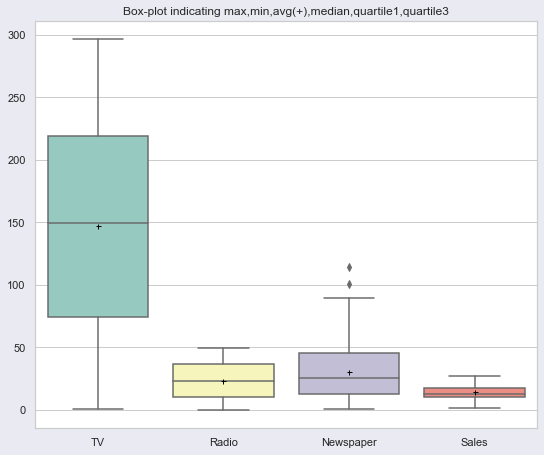

In [8]:
# Box-plot displaying the above statistical data for each category
import matplotlib.pyplot as plt
import seaborn as sns
df1=df.copy()
df1=df1.drop(df1.columns[0],axis=1) #removing column0 
sns.set(style='whitegrid')
ax=plt.subplots(figsize=(9, 7.5), facecolor='#eaeaf2')
ax=sns.boxplot(data=df1, linewidth=1.5, palette='Set3', showmeans=True,
               meanprops={"marker": "+","markeredgecolor": "black","markersize": "5"})
plt.title("Box-plot indicating max,min,avg(+),median,quartile1,quartile3")

Almost all the statistical parameters (max,avg,median,quartile1,quartile3) are considerably higher for TV when compared to the rest( Radio, Newspaper, Sales)

### 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings

To check if the same amount was spent for the 3 advertisements we make use of one-way ANOVA

Null Hypothesis: The mean amount spent on 3 advertisements are equal
Alternate Hypothesis: The amount spent on atleast one advertisement is different from the rest

Consider a level of significance(alpha) of 5% (0.05)

In [18]:
alpha=0.05
from scipy.stats import f_oneway
f_statistic, p_value=f_oneway(df['TV'],df['Radio'],df['Newspaper'])
print("\033[1mFrom one-way ANOVA test:\033[0m")
print("f-statistic=",f_statistic," , p-Value=",p_value)
print("\n\033[1mConclusion:\033[0m\n")
if p_value<alpha:
    print("As the p-value is significantly less than the alpha(0.05) we will reject the null hypothesis and thereby accept the alternate  hypothesis that the amount spent on atleast one advertisement is significantly different from the rest")
else:
    print("We will accept the null hypothesis and conclude that on an average the same amount was spent on all 3 advertisements ")

From one-way ANOVA test:
f-statistic= 358.8514595342597  , p-Value= 4.552931539744962e-103

Conclusion:

As the p-value is significantly less than the alpha(0.05) we will reject the null hypothesis and thereby accept the alternate  hypothesis that the amount spent on atleast one advertisement is significantly different from the rest
